In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('climate_action_data.csv')
print(df.head())

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [2]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [3]:
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [4]:
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [5]:
df.shape

(913, 10)

In [9]:
#Handle Missing Data.
df.dropna(subset = ['Date'], inplace = True)
x = df['Crop_Type'].mode()[0]
df.fillna({'Crop_Type' : x}, inplace = True)
print("Missing values after handling data")
df.isnull().sum()

Missing values after handling data


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [15]:
#Data in wrong format
#Handling columns with error values
#Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())

df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())

df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors ='coerce')
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

print(df.dtypes)
print("\n")
df.isnull().sum()

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object




Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [16]:
#Wrong data
#we will use standerd deviation
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = df[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan)
        df[col] = df[col].fillna(df[col].median())
        
df.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [ ]:
#Duplicates
df.duplicated().sum()

np.int64(111)

In [24]:
df.drop_duplicates(inplace = True)
#df['Date'].duplicated().sum()
print("Number of duplictes: ", df.duplicated().sum())

print("Number of duplicate dates:", df['Date'].duplicated().sum())

Number of duplictes:  0
Number of duplicate dates: 0


In [37]:
#The clean dataset - no null values
df.isnull().sum()
df.shape

(798, 10)

Exploratory Data Analysis

Text(0.5, 1.0, 'Soil_pH Distribution')

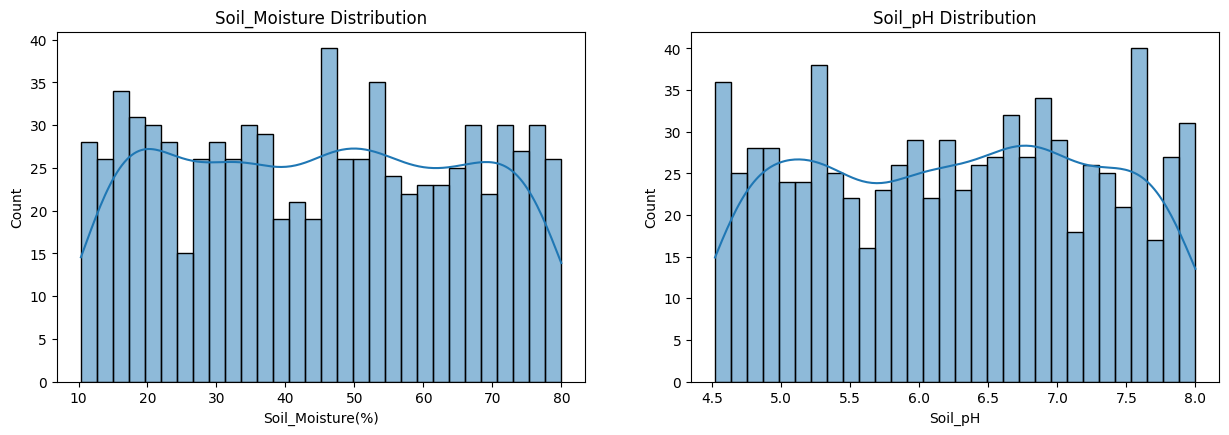

In [ ]:
#Soil_Moisture(%),Soil_pH distribution

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde = True)
plt.title('Soil_Moisture Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Soil_pH'], bins=30, kde = True)
plt.title('Soil_pH Distribution')

Text(0.5, 1.0, 'Humidity Distribution')

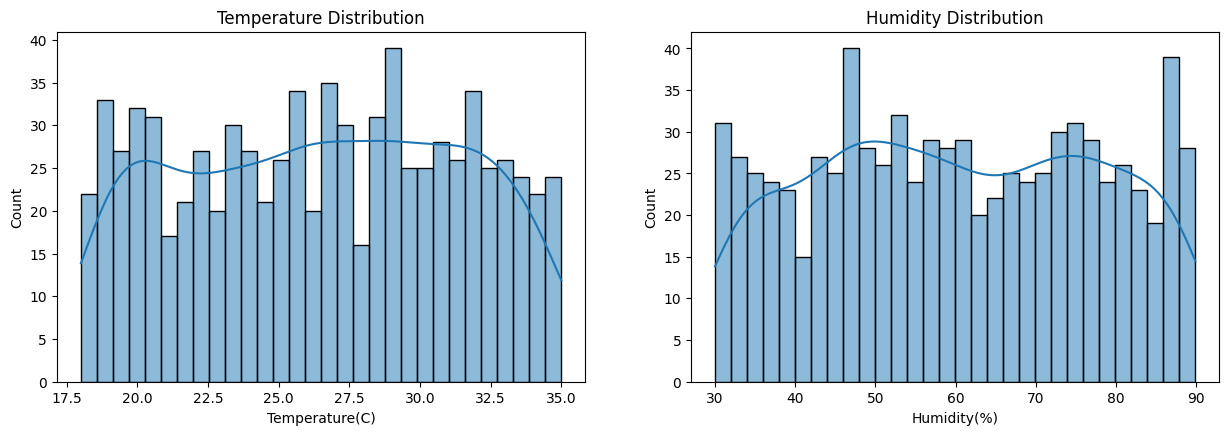

In [29]:
#Temperature(C),Humidity(%) distribution

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde = True)
plt.title('Temperature Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde = True)
plt.title('Humidity Distribution')

Text(0.5, 1.0, 'Irrigation_Recommended distribution')

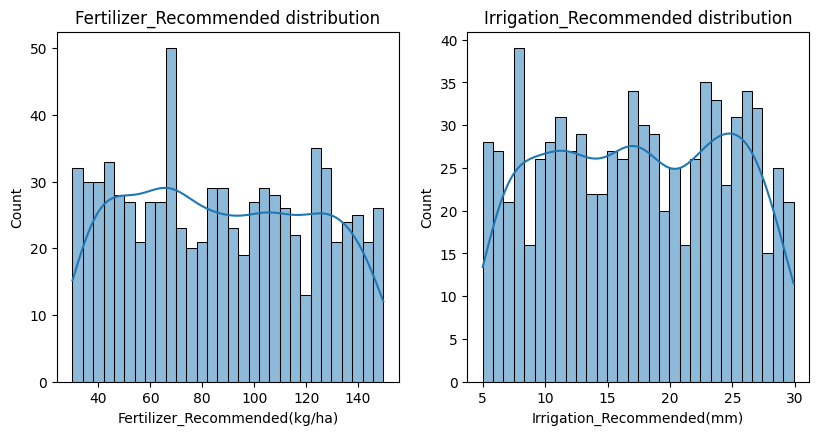

In [33]:
#Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde = True)
plt.title('Fertilizer_Recommended distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde = True)
plt.title('Irrigation_Recommended distribution')

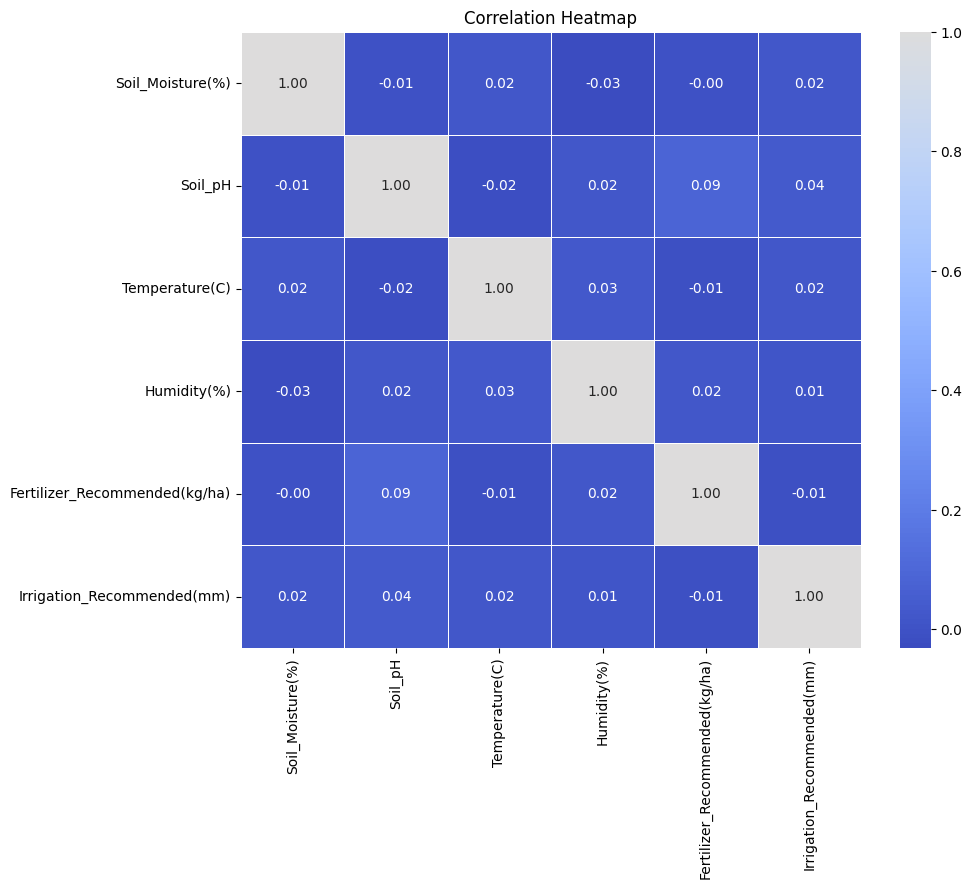

In [36]:
#Correlation Heatmap
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH','Temperature(C)' ,'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

Crop type with highest average soil moisture: Wheat (47.36%)


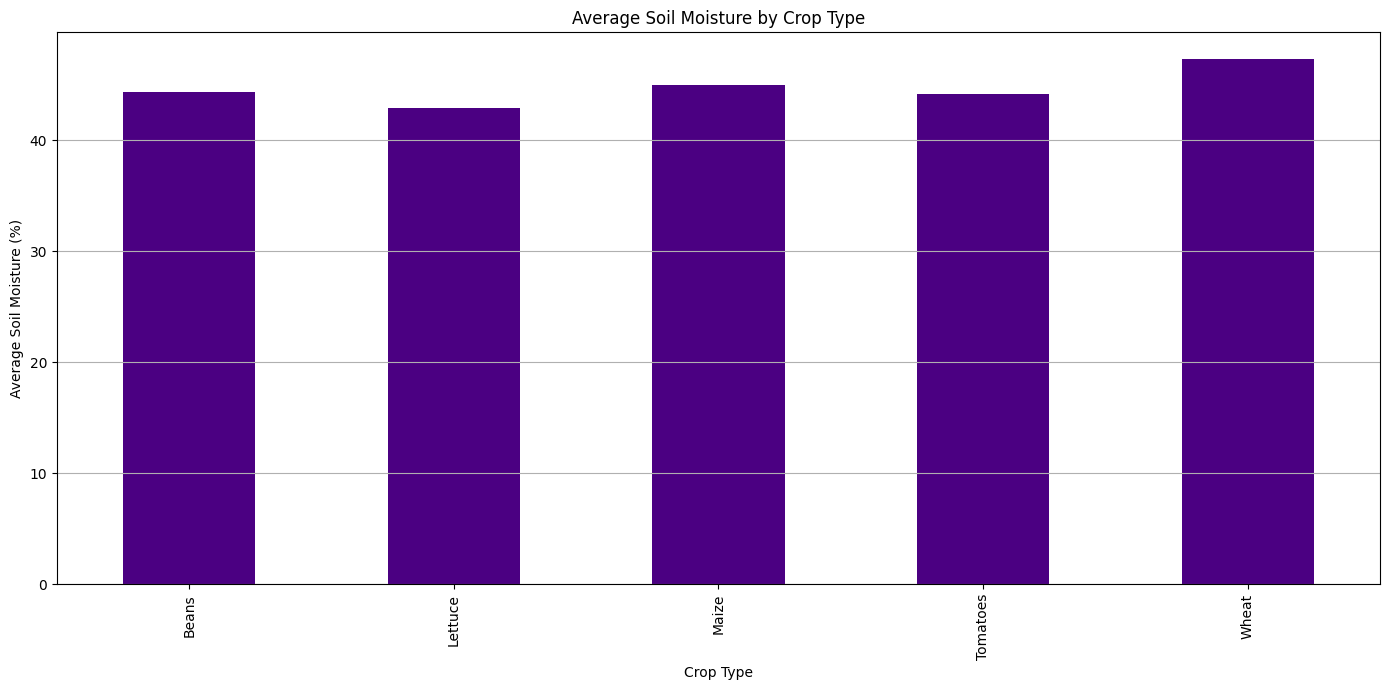

In [48]:
#determine the crop type with the highest average soil moisture,


# Calculate average soil moisture per crop type
avg_moisture_per_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()

# Determine the crop type with the highest average soil moisture
max_crop = avg_moisture_per_crop.idxmax()
max_value = avg_moisture_per_crop.max()
print(f"Crop type with highest average soil moisture: {max_crop} ({max_value:.2f}%)")

# 
plt.figure(figsize=(14, 7))
avg_moisture_per_crop.plot(kind='bar', color='indigo')
plt.xlabel('Crop Type')
plt.ylabel('Average Soil Moisture (%)')
plt.title('Average Soil Moisture by Crop Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Crop type with highest average temperature: Maize (27.01%)
Crop type with lowest average temperature: Lettuce (26.16%)


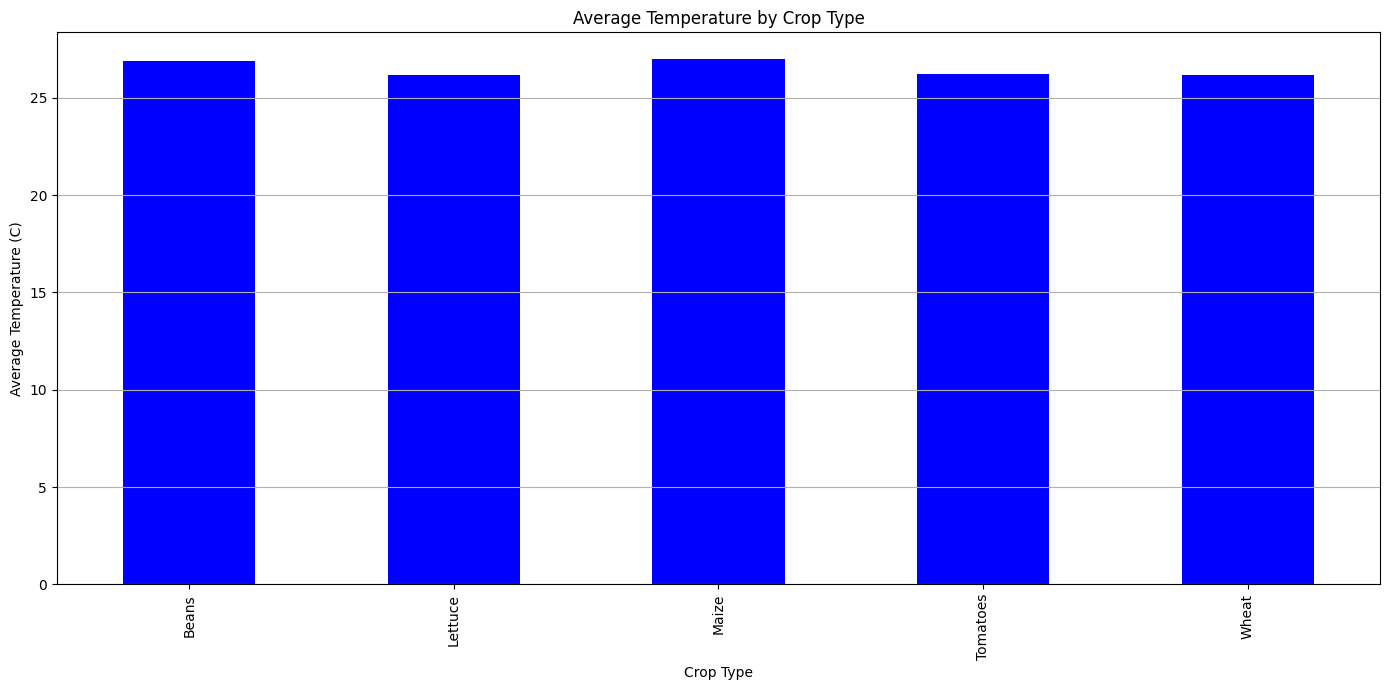

In [54]:
#suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C

avg_temperature_per_crop = df.groupby('Crop_Type')['Temperature(C)'].mean()

# Determine the crop type with the highest average soil moisture
max_crop = avg_temperature_per_crop.idxmax()
max_value = avg_temperature_per_crop.max()
print(f"Crop type with highest average temperature: {max_crop} ({max_value:.2f}%)")

min_crop = avg_temperature_per_crop.idxmin()
min_value = avg_temperature_per_crop.min()
print(f"Crop type with lowest average temperature: {min_crop} ({min_value:.2f}%)")


plt.figure(figsize=(14, 7))
avg_temperature_per_crop.plot(kind='bar', color='blue')
plt.xlabel('Crop Type')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature by Crop Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In my Analysis, soil pH and humiidity variables affect fertilizer recommendations
Wheat has the highest average soil moisture

in the figure above, the highest average temperature experienced is 27.01%
Therefore, there is no crop type experiencing an average temperature above 30°C.

Insights and recommendations.
wheat has the highest average soil moisture 
Maize experiences the highest average temperature

I recommend the wheat soil to be used by other crops especially maize crops which experience high temperatures. 
The wheat soil should be monitored and varied with other variables to check what retains the moisture.